# Regression using Neural Networks with Python

## Import Libraries

In [52]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

## Data Preparation

In [53]:
def load_csv(data):
    dataset = pd.read_csv(data)
    return dataset

In [54]:
def variable_data(dataset):
    # target 
    target = dataset.values[:, 1].astype('uint8')
    # spectra
    spectra = dataset.values[:, 2:].astype('float')
    # wavelengt
    cols = list(dataset.columns.values.tolist())
    wls = [float(x) for x in cols[2:]]
    return target, spectra, wls

In [ ]:
path = 'd://z/master/aicourse/dataset/'
file_name = 'pone.0105708.s001.csv'
data_path = path + file_name

In [56]:
dataset = load_csv(data_path)
dataset.head()

,ID,"TOC, g/kg",350,360,370,380,390,400,410,420,...,2410,2420,2430,2440,2450,2460,2470,2480,2490,2500
0,1,6.29,0.072589,0.061955,0.063675,0.063135,0.066972,0.070977,0.069861,0.071933,...,0.086759,0.084862,0.081912,0.079585,0.076956,0.075974,0.073314,0.070830,0.069876,0.069063
1,2,6.76,0.042898,0.034568,0.053941,0.052785,0.059631,0.061659,0.064115,0.067952,...,0.094764,0.092409,0.089980,0.087371,0.085789,0.085102,0.082554,0.081056,0.079909,0.078432
2,3,4.92,0.082379,0.080480,0.077189,0.080555,0.080869,0.082513,0.082648,0.083826,...,0.097920,0.096280,0.093508,0.091178,0.090500,0.089514,0.086660,0.086204,0.084294,0.082553
3,4,4.24,0.091544,0.093342,0.084792,0.088000,0.087185,0.087312,0.086290,0.088558,...,0.100739,0.098757,0.095746,0.093395,0.092380,0.090690,0.088237,0.086569,0.084940,0.085837
4,5,4.80,0.067505,0.069627,0.072542,0.074105,0.073409,0.073105,0.072204,0.074080,...,0.094117,0.092215,0.089890,0.086678,0.086376,0.084678,0.083291,0.080517,0.080111,0.078964


In [57]:
target, spectra, wavelength = variable_data(dataset)
print('target \n', target)
print('spectra \n', spectra)
print('wavelength \n', wavelength)

target 
 [ 6  6  4  4  4  5  6  7  5  5  4  5  4  5  5  4 25 24 24 24 25 25 19 21
 14 15 13 23 24 23 22 20 19 21 20 19 18 18 19 15 13 12 14 12 13 12 12 10
 14 12 12 11 12  9 13 18 14 17 17 12 14 11 11 11 13 15 14 11 13 13 16 16
 15 15 14 13 12 15 14 16 11 11 12 13 13 14 13 15 34 22 29 35 32 33 33 29
 27 33 32 33 32 35 36 35 18 18 15 14 15 16 15 15 15 18 16 14 15 16 14 13
 16 17 16 17 15 16 14 14 16 16 16 13 12 14 16 10 16 15 13 16 13 15 12 11
 13 13 13 13 13 13 12 12 14 14 13 14 14 14 13  9 14 15 15 17 12 15 10  5
 14 14 14 14 13 12 12 10 13 14 14 12 13 13 11 14]
spectra 
 [[0.0725894 0.0619552 0.0636752 ... 0.0708299 0.0698764 0.0690634]
 [0.0428983 0.0345675 0.0539411 ... 0.0810562 0.0799086 0.0784324]
 [0.082379  0.0804796 0.0771894 ... 0.0862037 0.0842945 0.0825527]
 ...
 [0.0982558 0.118544  0.126166  ... 0.0807325 0.0782342 0.0774173]
 [0.0439395 0.0727766 0.0876578 ... 0.0693885 0.0653561 0.0659853]
 [0.0209513 0.116337  0.0997462 ... 0.0792494 0.0769616 0.0759141]]
wavelength 


In [58]:
x_col = spectra.shape[1]
x_row = spectra.shape[0]
print('number of data: ', x_row)
print('number of variable: ', x_col)

number of data:  184
number of variable:  216


## Data visualization

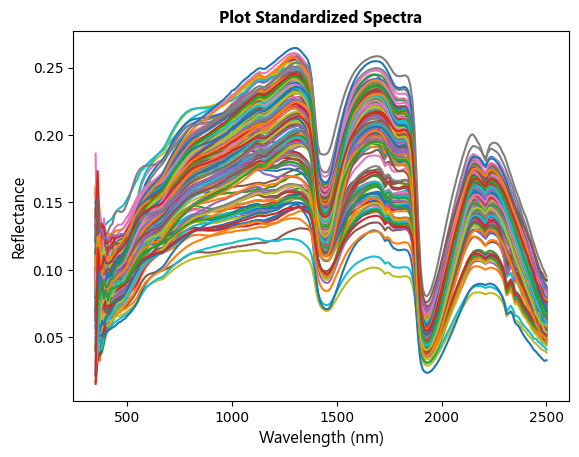

In [59]:
plt.plot(wavelength, spectra.T)
plt.title('Plot Standardized Spectra', fontweight='bold', fontsize=12, fontname="Segoe UI")
plt.ylabel('Reflectance', fontsize=12, fontname="Segoe UI")
plt.xlabel('Wavelength (nm)', fontsize=12, fontname="Segoe UI")
#plt.legend(loc='best')
plt.grid(False)
plt.savefig(f'{path}Plot_spectra{file_name}.png')
plt.show()


## Data Standardization

In [60]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def minmaxscaler(input):
    input_data = np.array(input)
    x_min = input_data.min()
    x_max = input_data.max()
    x = (input_data - x_min) / (x_max - x_min)
    return x

def standardscaler(input):
    return StandardScaler().fit_transform(input)

x_std = standardscaler(spectra)
x_norm = minmaxscaler(spectra)

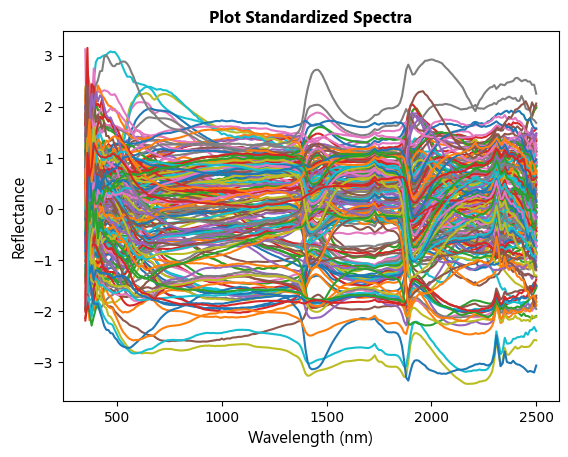

In [61]:
plt.plot(wavelength, x_std.T)
plt.title('Plot Standardized Spectra', fontweight='bold', fontsize=12, fontname="Segoe UI")
plt.ylabel('Reflectance', fontsize=12, fontname="Segoe UI")
plt.xlabel('Wavelength (nm)', fontsize=12, fontname="Segoe UI")
#plt.legend(loc='best')
plt.grid(False)
plt.savefig(f'{path}Plot_standardized_spectra_{file_name}.png')
plt.show()


## Build Neural Networks

Epoch 1/200


d:\z\master\venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 13.2483 - val_loss: 9.7087
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11.7492 - val_loss: 8.5382
Epoch 3/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.8495 - val_loss: 7.0081
Epoch 4/200


d:\z\master\venv\lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `mean_absolute_error` which is not available. Available metrics are: loss,val_loss
  current = self.get_monitor_value(logs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.9158 - val_loss: 5.9840
Epoch 5/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.9055 - val_loss: 5.9268
Epoch 6/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.7906 - val_loss: 5.8432
Epoch 7/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.8162 - val_loss: 5.4844
Epoch 8/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.1691 - val_loss: 5.2738
Epoch 9/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.6538 - val_loss: 5.1016
Epoch 10/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.4553 - val_loss: 4.8469
Epoch 11/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.9080 - val_loss: 4.4798
Epoch 12/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.9495 - val_loss: 4.1489
Epoch 13/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.6508 - val_loss: 4.1734
Epoch 14/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.2757 - val_loss: 4.1019
Epoch 15/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.2366 - val_loss: 4.1549
Epoch 16/

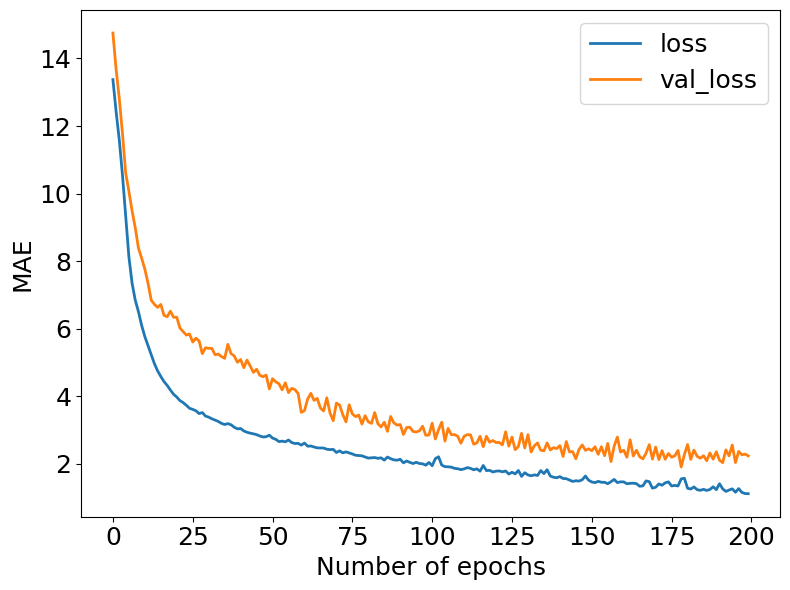

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
R2: 0.661, RMSE: 4.290, MAE: 3.215


In [62]:
from sklearn.model_selection import train_test_split, KFold
from keras import models, layers, optimizers, callbacks
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(x_std, target, test_size=0.2)

seed = 7; np.random.seed(seed)
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
for train, test in kfold.split(X_train, y_train):
    model = models.Sequential([
        layers.Dense(256, input_dim = x_col, activation='relu', kernel_initializer='he_normal'),
        layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
        layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
        layers.Dense(32, activation='relu', kernel_initializer='he_normal'),
        layers.Dense(16, activation='relu', kernel_initializer='he_normal'),
        layers.Dense(8, activation='relu', kernel_initializer='he_normal'),
        layers.Dense(4, activation='relu', kernel_initializer='he_normal'),
        layers.Dense(1, activation='linear')
    ])
    model.compile(loss='mean_absolute_error', 
                  optimizer=optimizers.Adam(learning_rate=0.0001))
    es = callbacks.EarlyStopping(monitor='mean_absolute_error',
                                 min_delta=0,
                                 mode='min', 
                                 verbose=0, 
                                 baseline=None,
                                 patience=5, 
                                 restore_best_weights=True)
        
    history = model.fit(X_train[train], y_train[train],
                         epochs =200,
                         batch_size = 16,
                         validation_data = (X_train[test], y_train[test]), 
                         callbacks = [es],
                         verbose=1)
    
with plt.style.context(()):
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(history.history['loss'], linewidth=2, label='loss')
    ax.plot(history.history['val_loss'], linewidth=2, label='val_loss')
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    ax.set_xlabel('Number of epochs',fontsize=18)
    ax.set_ylabel('MAE',fontsize=18)
    plt.legend(fontsize=18)
    plt.savefig(f'{path}Plot_hisotry_ann_{file_name}.png')
    plt.tight_layout()
plt.show()

predictions = model.predict(X_test).flatten()
rmse, mae, score = np.sqrt(mean_squared_error(y_test, predictions)), \
                   mean_absolute_error(y_test, predictions), \
                   r2_score(y_test, predictions)
print("R2: %5.3f, RMSE: %5.3f, MAE: %5.3f" %(score, rmse, mae))

## Build Neural Networks

Epoch 1/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 14.9896 - val_loss: 9.9703
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 12.7268 - val_loss: 8.4283
Epoch 3/200
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 10.6203

d:\z\master\venv\lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `mean_absolute_error` which is not available. Available metrics are: loss,val_loss
  current = self.get_monitor_value(logs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 9.2564 - val_loss: 6.6718
Epoch 4/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 7.1623 - val_loss: 6.2339
Epoch 5/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 6.7312 - val_loss: 5.3921
Epoch 6/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.3895 - val_loss: 4.9826
Epoch 7/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.2441 - val_loss: 4.4873
Epoch 8/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.7629 - val_loss: 4.4544
Epoch 9/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.2534 - val_loss: 4.2764
Epoch 10/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.0687 - val_loss: 5.0569
Epoch 11/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.4499 - val_loss: 3.9029
Epoch 12/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.3574 - val_loss: 4.0010
Epoch 13/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.6177 - val_loss: 4.0877
Epoch 14/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.3011 - val_loss: 3.8458

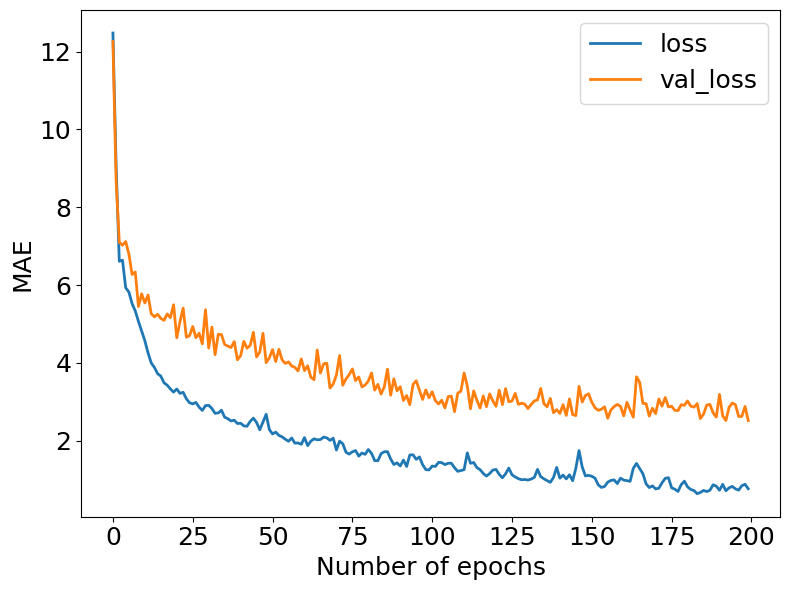

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
R2: 0.723, RMSE: 3.881, MAE: 3.018


In [63]:
from sklearn.model_selection import train_test_split, KFold
from keras import models, layers, optimizers, callbacks
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(x_std, target, test_size=0.2)

seed = 7; np.random.seed(seed)
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
for train, test in kfold.split(X_train, y_train):
    def conv_1d_block(x, num_filters, filter_size, conv_stride):
        # 1D convolutional block without batch normalization
        x = layers.Conv1D(num_filters, 
                      kernel_size=filter_size, 
                      strides=conv_stride, 
                      padding='same', 
                      kernel_initializer = 'he_normal')(x)
        x = layers.Activation('relu')(x)
        return x
    def AlexNet(input_dim, output_dim, num_filters=16):
        # Initialize the model along with the input shape to be "channel last"
        # and the channels dimension itself
        inputs = layers.Input(shape=(input_dim, 1))
        # BLOCK 1: CONV -> RELU -> POOL 
        conv1 = conv_1d_block(inputs, 
                          num_filters=num_filters * (2 ** 0),
                          filter_size=11,
                          conv_stride=4)
        pool1 = layers.MaxPooling1D(pool_size=3, strides=2)(conv1)
    
        # BLOCK 2: CONV -> RELU -> POOL 
        conv2 = conv_1d_block(pool1, 
                          num_filters=num_filters * (2 ** 1),
                          filter_size=5,
                          conv_stride=2)
        pool2 = layers.MaxPooling1D(pool_size=3, strides=2)(conv2)
    
        # BLOCK 3: CONV -> RELU -> CONV -> RELU -> CONV -> RELU
        conv3 = conv_1d_block(pool2, 
                          num_filters=num_filters * (2 ** 2),
                          filter_size=3,
                          conv_stride=1)
        conv4 = conv_1d_block(conv3,
                          num_filters=num_filters * (2 ** 3),
                          filter_size=3,
                          conv_stride=1)
        conv5 = conv_1d_block(conv4, 
                          num_filters=num_filters * (2 ** 4),
                          filter_size=3,
                          conv_stride=1)
        # 3 POOLS 
        pool3 = layers.MaxPooling1D(pool_size=3, strides=2)(conv5)
    
        flatten = layers.Flatten(name='flatten')(pool3)
    
        # FC -> RELU
        dense1 = layers.Dense(256, activation='relu')(flatten)
        # FC -> RELU
        dense2 = layers.Dense(256, activation='relu')(dense1)
        # FC -> SOFTMAX
        # Output layer
        out = layers.Dense(output_dim, activation='linear')(dense2)
        # Create the model 
        model = models.Model(inputs=inputs, outputs=out)
        return model

    model = AlexNet(x_col, output_dim=1)
    model.compile(loss='mean_absolute_error', 
                  optimizer=optimizers.Adam(learning_rate=0.0001))
    es = callbacks.EarlyStopping(monitor='mean_absolute_error',
                                 min_delta=0,
                                 mode='min', 
                                 verbose=0, 
                                 baseline=None,
                                 patience=5, 
                                 restore_best_weights=True)
        
    history = model.fit(X_train[train], y_train[train],
                         epochs =200,
                         batch_size = 16,
                         validation_data = (X_train[test], y_train[test]), 
                         callbacks = [es],
                         verbose=1)
    
with plt.style.context(()):
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(history.history['loss'], linewidth=2, label='loss')
    ax.plot(history.history['val_loss'], linewidth=2, label='val_loss')
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    ax.set_xlabel('Number of epochs',fontsize=18)
    ax.set_ylabel('MAE',fontsize=18)
    plt.legend(fontsize=18)
    plt.savefig(f'{path}Plot_hisotry_cnn.png')
    plt.tight_layout()
plt.show()

predictions = model.predict(X_test).flatten()
rmse, mae, score = np.sqrt(mean_squared_error(y_test, predictions)), \
                   mean_absolute_error(y_test, predictions), \
                   r2_score(y_test, predictions)
print("R2: %5.3f, RMSE: %5.3f, MAE: %5.3f" %(score, rmse, mae))